Dados retirados do Kaggle (https://www.kaggle.com/datasets)

* https://www.kaggle.com/datasets/jvanark/nvidia-daily-stock-price-data

         Date      Open      High       Low     Close      Volume
0  2004-01-02  0.196417  0.199083  0.192333  0.192333   436416000
1  2004-01-05  0.195250  0.199917  0.193500  0.198583   575292000
2  2004-01-06  0.198000  0.209417  0.197083  0.206667  1093344000
3  2004-01-07  0.204333  0.209500  0.202917  0.208500   673032000
4  2004-01-08  0.211083  0.212083  0.207250  0.209250   433752000
Colunas disponíveis no dataset: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 69.1179 - val_loss: 0.7068
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.1686 - val_loss: 0.1420
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8636 - val_loss: 0.0554
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5645 - val_loss: 0.0618
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6632 - val_loss: 0.0483
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.5192 - val_loss: 0.0479
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5844 - val_loss: 0.0682
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4476 - val_loss: 0.0653
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4938 - val_loss: 0.1060
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4742 - val_loss: 0.0696
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6164 - val_loss: 0.0519
Epoch 12/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

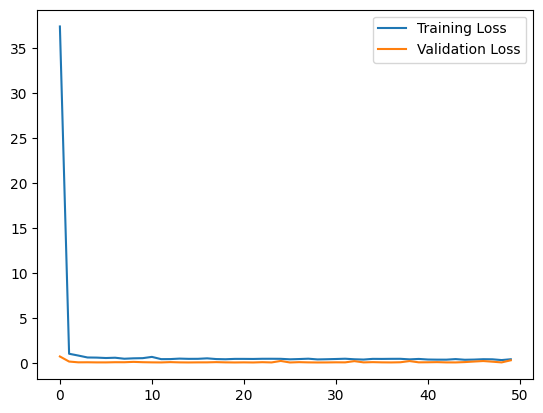

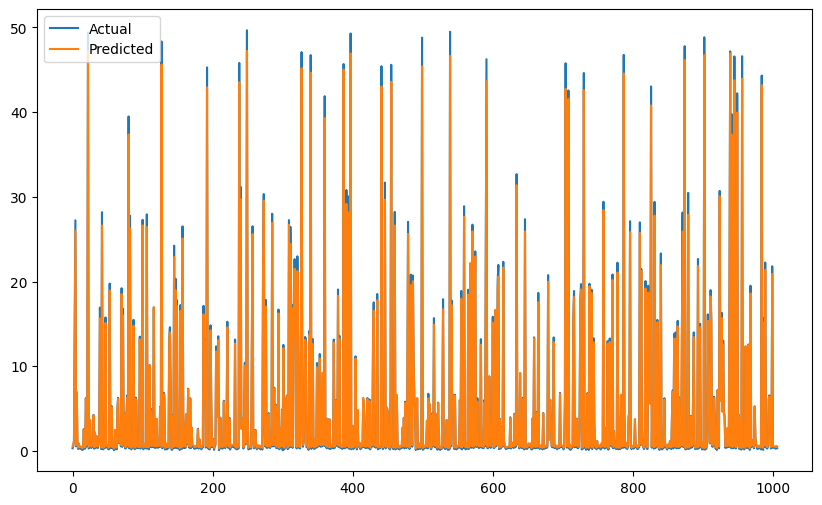

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = pd.read_csv('nvidia_stock_prices.csv')

# Visualizar os dados
print(data.head())

# Verificar os nomes das colunas
print("Colunas disponíveis no dataset:", data.columns)

# Converter a coluna 'Date' para datetime (se necessário)
data['Date'] = pd.to_datetime(data['Date'])

# Selecionar as colunas de recursos e o alvo
features = ['Open', 'High', 'Low', 'Volume']  # Escolha as colunas relevantes como recursos
X = data[features]
y = data['Close']  # Prever o preço de fechamento

# Preencher valores ausentes com a média
X = X.fillna(X.mean())

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalizar os recursos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir o modelo de rede neural
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Saída única para prever o preço de fechamento

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Avaliar o modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizar a perda ao longo do tempo
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plotar os valores previstos vs reais
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
pip install tensorflow pandas scikit-learn

In [ ]:
# Criar o modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Saída única para regressão
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='mean_squared_error',  # Função de perda para regressão
    metrics=['mae']  # Usar erro absoluto médio (MAE) como métrica adicional
)

# Treinar o modelo
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 100.3562 - mae: 4.8205 - val_loss: 29.5000 - val_mae: 2.9167
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 18.2797 - mae: 2.2565 - val_loss: 0.9659 - val_mae: 0.6561
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 12.9433 - mae: 1.6576 - val_loss: 1.8008 - val_mae: 0.8256
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.4507 - mae: 1.4940 - val_loss: 2.2589 - val_mae: 0.8470
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 12.6598 - mae: 1.5763 - val_loss: 1.3689 - val_mae: 0.6580
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12.2354 - mae: 1.5193 - val_loss: 1.6746 - val_mae: 0.6841
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11.4677 - mae: 1.3532 - val_loss: 0.7910 - val_mae: 0.4851
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.6880 - mae: 1.2793 - val_loss: 0.8769 - val_mae: 0.4691
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - 


Erro Absoluto Médio (MAE) no conjunto de teste: 0.5084
Perda (MSE) no conjunto de teste: 0.9300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


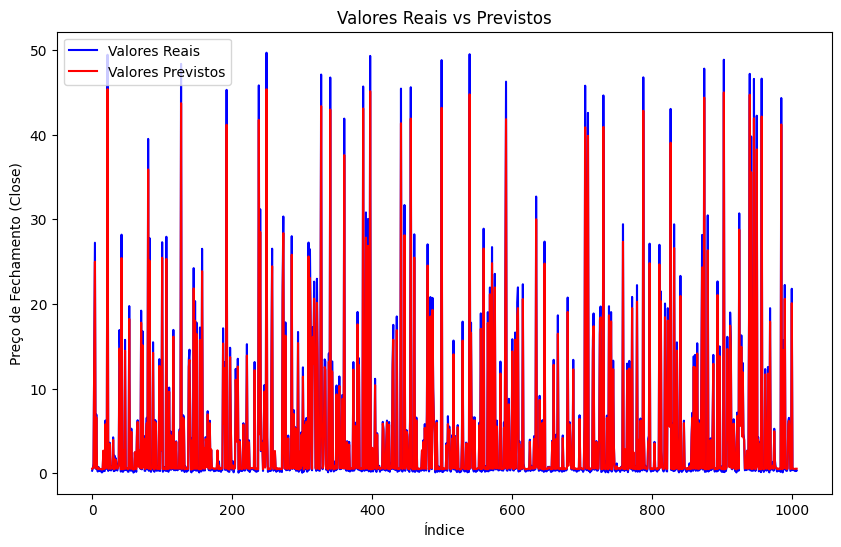

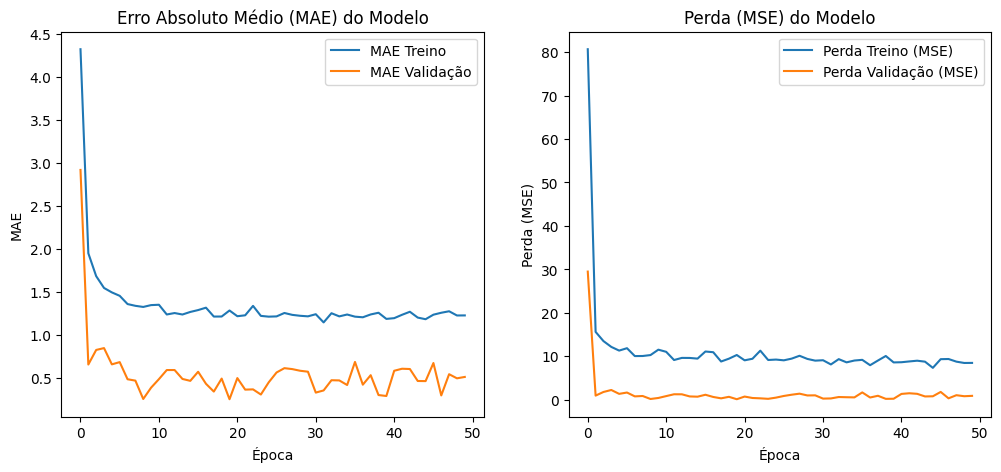

In [ ]:
# Avaliar o modelo
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nErro Absoluto Médio (MAE) no conjunto de teste: {mae:.4f}')
print(f'Perda (MSE) no conjunto de teste: {loss:.4f}')

# Prever no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Plotar valores previstos vs valores reais
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Valores Reais', color='blue')
plt.plot(y_pred, label='Valores Previstos', color='red')
plt.title('Valores Reais vs Previstos')
plt.xlabel('Índice')
plt.ylabel('Preço de Fechamento (Close)')
plt.legend()
plt.show()

# Plotar as curvas de treinamento
plt.figure(figsize=(12,5))

# Erro Absoluto Médio (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE Treino')
plt.plot(history.history['val_mae'], label='MAE Validação')
plt.title('Erro Absoluto Médio (MAE) do Modelo')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

# Perda (MSE)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treino (MSE)')
plt.plot(history.history['val_loss'], label='Perda Validação (MSE)')
plt.title('Perda (MSE) do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()

plt.show()
